In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
# Sample Data
from sklearn.datasets import make_classification

data, label = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2021
)

In [3]:
data.shape, label.shape

((1000, 20), (1000,))

In [4]:
# Data EDA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [5]:
pca_data = pca.fit_transform(data)

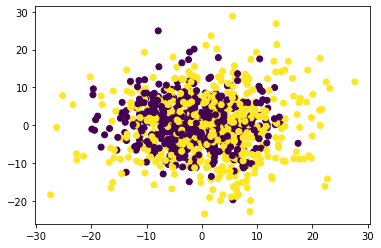

In [6]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=label)
# PCA로는 구분이 어렵다

In [7]:
# Data Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021
)

In [8]:
# 개별 모델의 성능
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [9]:
# 5개의 모델을 dictionary models에 넣음
models = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'svm': SVC(),
    'bayes': GaussianNB(),
}

In [10]:
# Classification 문제이므로 accuracy로 성능 평가
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [11]:
names = []
results = []
for name, model in models.items():
    result = cross_val_score(model, train_data, train_label, cv=3, scoring="accuracy")
    names += [name]
    results += [result]

In [12]:
results

[array([0.79487179, 0.74678112, 0.81545064]),
 array([0.88888889, 0.90128755, 0.86266094]),
 array([0.74786325, 0.75965665, 0.75107296]),
 array([0.91025641, 0.89270386, 0.9055794 ]),
 array([0.75213675, 0.76824034, 0.77253219])]

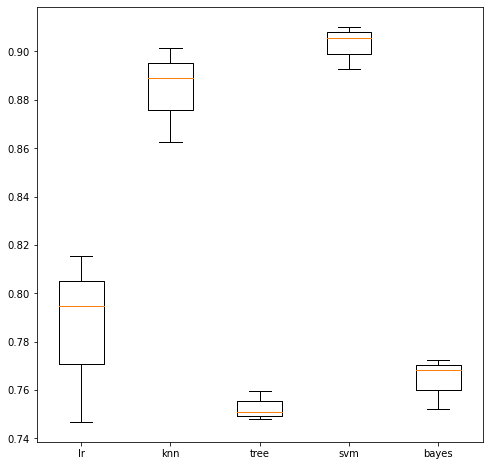

In [13]:
# Boxplot으로 각각의 성능 평가
# SVM > KNN > Logistic > Bayes > Tree
plt.figure(figsize=(8, 8))
plt.boxplot(results, labels=names)
plt.show()

In [14]:
for name, model in models.items():
    model.fit(train_data, train_label)
    test_pred = model.predict(test_data)
    acc = accuracy_score(test_label, test_pred)
    print(f"Model {name} test accuracy is {acc:.4}")

Model lr test accuracy is 0.7833
Model knn test accuracy is 0.8633
Model tree test accuracy is 0.7767
Model svm test accuracy is 0.9167
Model bayes test accuracy is 0.78


In [15]:
# Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # Meta Model

In [16]:
models.keys()

dict_keys(['lr', 'knn', 'tree', 'svm', 'bayes'])

In [17]:
stacking = StackingClassifier(
    estimators=list(models.items()),
    final_estimator=LogisticRegression(),
    cv=3
)

In [18]:
stacking_result = cross_val_score(stacking, train_data, train_label, cv=3, scoring="accuracy")

In [19]:
stacking_result

array([0.91025641, 0.91845494, 0.88841202])

In [20]:
all_result = []
all_result.extend(results)
all_result.append(stacking_result)

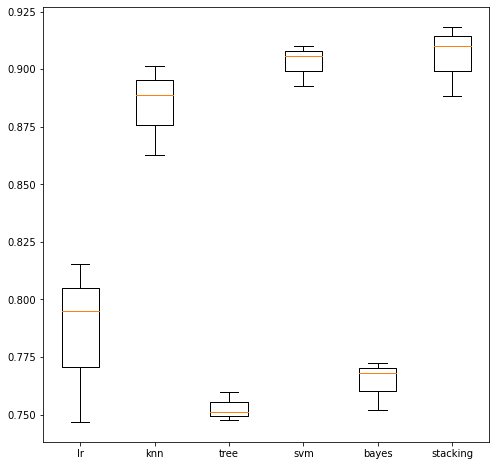

In [21]:
plt.figure(figsize=(8, 8))
plt.boxplot(all_result, labels=names + ["stacking"])
plt.show()
# Stacking 결과, SVM보다 평균은 낮지만 분산 폭이 크다

In [22]:
for name, model in models.items():
    test_pred = model.predict(test_data)
    acc = accuracy_score(test_label, test_pred)
    print(f"Model {name} test accuracy is {acc:.4}")

stacking.fit(train_data, train_label)
stacking_pred = stacking.predict(test_data)
stacking_acc = accuracy_score(test_label, stacking_pred)
print(f"Model stacking test accuracy is {stacking_acc:.4}")

Model lr test accuracy is 0.7833
Model knn test accuracy is 0.8633
Model tree test accuracy is 0.7767
Model svm test accuracy is 0.9167
Model bayes test accuracy is 0.78
Model stacking test accuracy is 0.9233


In [ ]:
# Stacking이 각 모델의 개별 성능보다 더 좋음